In [1]:
import sys
import flap

sys.path.append(r"E:\marci main\Fusion\nti-wavelet-tools\python\utility")
import convert_dict_to_flap
sys.path.append(r"E:\marci main\Fusion\nti-wavelet-tools\python\core")
import core

INIT flap storage


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cmath

In [3]:
path = r"E:\marci main\fusion\inputdata\AUGD_35628_tor_bal_raw.sav"
print(path)

obj = core.NWTDataObject()
obj.load_raw_sav(path)

E:\marci main\fusion\inputdata\AUGD_35628_tor_bal_raw.sav


In [4]:
print(obj.raw_data.data)
flap.list_data_objects(obj.raw_data)

[[15.04103    14.7743635  15.0102625  ... 15.348719   15.246161
  15.225641  ]
 [-0.220491   -0.3230567  -0.14869262 ... -0.05638269 -0.15894839
  -0.04612692]
 [ 0.446174    0.446174    0.446174   ...  0.16925223  0.06668653
   0.21028331]
 ...
 [ 0.9282272   0.9282272   0.846173   ...  0.6615612   0.5384839
   0.49746084]
 [-0.56920314 -0.5384359  -0.5999785  ... -0.4563897  -0.48715702
  -0.5589474 ]
 [ 0.8051499   0.77438265  0.6615612  ...  2.087201    2.2000225
   2.0666895 ]]

-----------------------------
<1>(data_source:"" exp_id:"AUGD-35628") data_title:"raw data" shape:[8,40001][no error]
  Data name:"unit", unit:"a.u."
  Coords:
    'Time [s](Dims:1, Shape:[40001]) [<R. symm.>] Val. range:  1.020E+00 -  1.040E+00
    'Channels [a.u.](Dims:0, Shape:[8]) [<R. symm.>] Val:MHI-B17-02, MHI-B31-40, MHI-B31-14, MHI-B31-03, MHI-B31-01, MHI-B31-02, MHI-B31-12, MHI-B31-13
    'Theta [rad](Dims:0, Shape:[8]) [<R. symm.>] Val: 5.962E+00,  5.905E+00,  5.985E+00,  5.990E+00,  5.995E+00, 

'\n-----------------------------\n<1>(data_source:"" exp_id:"AUGD-35628") data_title:"raw data" shape:[8,40001][no error]\n  Data name:"unit", unit:"a.u."\n  Coords:\n    \'Time [s](Dims:1, Shape:[40001]) [<R. symm.>] Val. range:  1.020E+00 -  1.040E+00\n    \'Channels [a.u.](Dims:0, Shape:[8]) [<R. symm.>] Val:MHI-B17-02, MHI-B31-40, MHI-B31-14, MHI-B31-03, MHI-B31-01, MHI-B31-02, MHI-B31-12, MHI-B31-13\n    \'Theta [rad](Dims:0, Shape:[8]) [<R. symm.>] Val: 5.962E+00,  5.905E+00,  5.985E+00,  5.990E+00,  5.995E+00,  5.981E+00,  5.973E+00,  5.986E+00\n    \'Phi [rad](Dims:0, Shape:[8]) [<R. symm.>] Val: 1.524E+00,  2.791E+00,  3.596E+00,  4.743E+00,  4.773E+00,  5.184E+00,  5.747E+00,  6.753E+00'

# testing with generated data

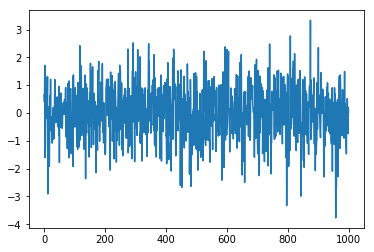

In [5]:
samples = 1000
data = np.random.normal(0,1,samples)
plt.plot(data)

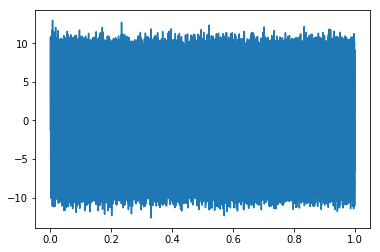

In [184]:
samples = 50000
f=600
x = np.linspace(start=0,num=samples,stop=1)
data = np.random.normal(0,1,samples)+9*np.sin(f*2*np.pi*x)
plt.plot(x,data)

In [185]:
n = 2*samples**0.5
f_ax, t_ax, stft = scipy.signal.stft(data, nperseg=n, noverlap = n-1, nfft = 10*n)

In [186]:
%%script false
max = np.max(np.abs(stft))
plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, np.abs(stft), vmin=0, vmax=max, shading='plasma')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.show()

plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, stft.real, vmin=-max, vmax=max, shading='plasma')
plt.title('STFT Real')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.show()

plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, stft.imag, vmin=-max, vmax=max, shading='plasma')
plt.title('STFT Imag')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.show()

plt.figure(figsize=(14,11))
plt.pcolormesh(t_ax, f_ax, np.angle(stft), vmin=-6, vmax=6, shading='plasma')
plt.title('STFT Phase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cax = plt.axes([0.91, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.show()

Couldn't find program: 'false'


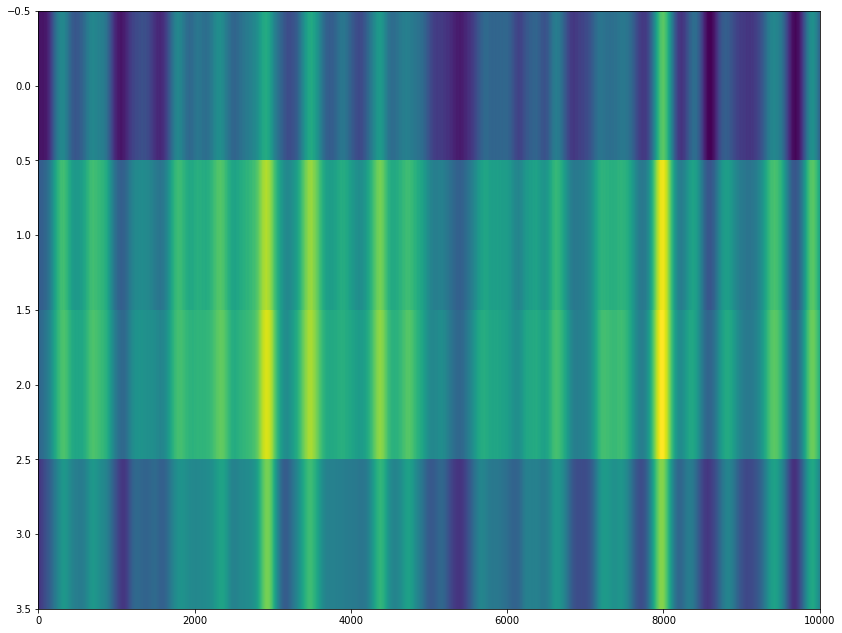

In [189]:
#plt.figure(figsize=(14,11))
#plt.imshow(stft.real,aspect='auto')
#plt.show()

chosen= stft[52:56]
plt.figure(figsize=(14,11))
plt.imshow(np.abs(chosen)[:,5000:15000],aspect='auto')
plt.show()

[2.29231895 2.31236876 2.33239499 ... 2.26509092 2.24537144 2.22564273]


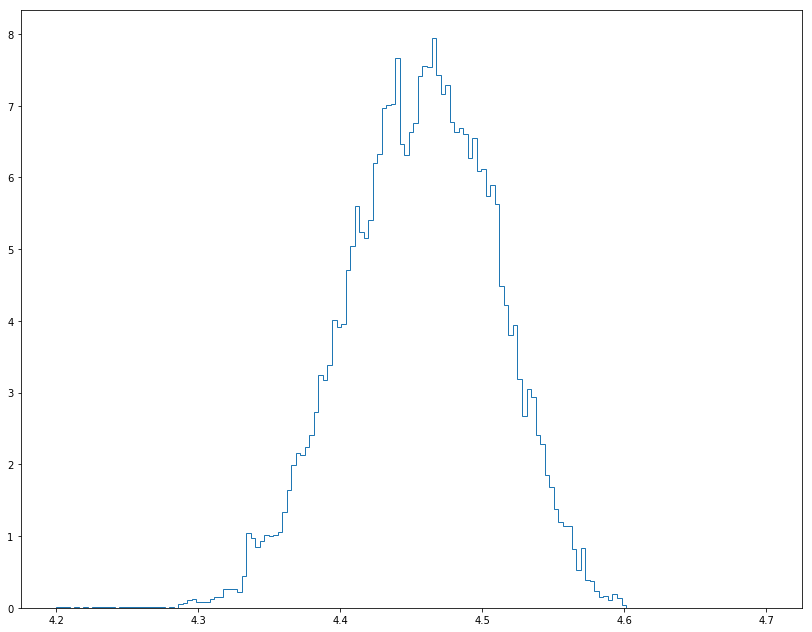

In [194]:
c = np.abs(chosen).flatten()
#c = chosen.real.flatten()
print(c)

plt.figure(figsize=(14,11))
n, bins, patches = plt.hist(c, bins=157, density = True,facecolor='b',histtype='step',range=(4.2,4.7))#
#plt.xlim(4.2,4.7)
plt.show()